 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://localhost:9009/ (Press CTRL+C to quit)
127.0.0.1 - - [21/Nov/2021 02:08:38] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [21/Nov/2021 02:08:38] "GET /leaflet.css HTTP/1.1" 404 -
127.0.0.1 - - [21/Nov/2021 02:08:38] "GET /leaflet.js HTTP/1.1" 404 -
127.0.0.1 - - [21/Nov/2021 02:08:39] "GET /food HTTP/1.1" 200 -


[{'Name': 'A Noy Bakery', 'Lat': None, 'Lng': None, 'Url': 'https://www.facebook.com/ANoyBakery/', 'Img_url': 'https://media-cdn.tripadvisor.com/media/photo-s/1b/20/2a/ca/a-noy-bakery-on-peng.jpg', 'Desc': 'Bakery'}, {'Name': 'Ho Ho Kitchen', 'Lat': None, 'Lng': None, 'Url': 'https://b-m.facebook.com/%E6%96%B0%E5%AF%B6%E9%A6%AC%E8%8C%B6%E9%A4%90%E5%BB%B3%E5%B0%8F%E5%BB%9Ahoho-kitchen-411172736050372/?ref=page_internal&mt_nav=0', 'Img_url': '', 'Desc': 'Cha Chaan Teng'}, {'Name': 'Island Table Grocer Cafe', 'Lat': None, 'Lng': None, 'Url': 'https://www.facebook.com/islandtable/', 'Img_url': '', 'Desc': 'Cafe'}, {'Name': 'Kam Yuen Restaurant', 'Lat': None, 'Lng': None, 'Url': 'https://www.openrice.com/zh/hongkong/r-%E9%87%91%E6%BA%90%E5%86%B0%E5%AE%A4-%E5%9D%AA%E6%B4%B2-%E5%A4%9A%E5%9C%8B%E8%8F%9C-r8253', 'Img_url': 'https://media.timeout.com/images/105620271/750/562/image.jpg', 'Desc': 'Cha Chaan Teng'}, {'Name': 'Kee Sum Cafe', 'Lat': None, 'Lng': None, 'Url': 'https://www.facebook.com
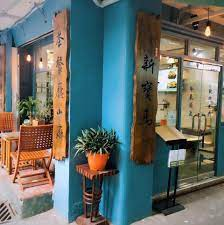
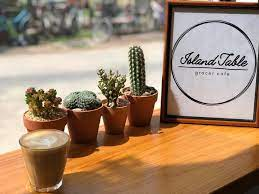

127.0.0.1 - - [21/Nov/2021 02:08:43] "GET /activity HTTP/1.1" 200 -


[{'Name': 'Finger Hill', 'Lat': None, 'Lng': None, 'Url': 'https://en.wikipedia.org/wiki/Finger_Hill', 'Img_url': 'https://www.dmw.gov.hk/images/l/IS_DMW522_1.jpg', 'Desc': 'Hiking'}, {'Name': 'Former Peng Chau Theatre', 'Lat': None, 'Lng': None, 'Url': 'https://en.wikipedia.org/wiki/Peng_Chau_Theatre', 'Img_url': 'https://img.shifiles.hk/articles/cover/20181018/6f6515d03a62b719c7c7a0350b66dc19.jpg!s728', 'Desc': 'Historial '}, {'Name': 'Lung Mo Temple', 'Lat': None, 'Lng': None, 'Url': 'https://www.discoverhongkong.com/ca/interactive-map/lung-mo-temple.html', 'Img_url': 'https://www.hlimg.com/images/things2do/738X538/ttd_1515749919m1.jpg', 'Desc': 'Temple'}, {'Name': 'Peng Chau Water Sport Centre', 'Lat': None, 'Lng': None, 'Url': 'https://m.facebook.com/groups/pengchauwatersportscentre/', 'Img_url': 'https://scontent.fhkg3-2.fna.fbcdn.net/v/t1.6435-9/104119986_10157623263563212_572897276863344211_n.jpg?_nc_cat=103&ccb=1-5&_nc_sid=8631f5&_nc_ohc=GwYdCgtlz8sAX8DDQ0B&_nc_ht=scontent.fhk
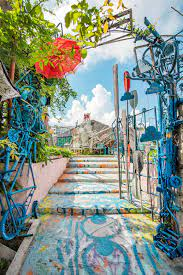

In [ ]:
from flask import Flask, render_template, url_for, session, flash, request, redirect
from datetime import datetime
from flask_sqlalchemy import SQLAlchemy
from flask_wtf import FlaskForm
from wtforms import StringField, PasswordField, SubmitField, BooleanField, TextAreaField
from wtforms.validators import InputRequired, Email, Length, ValidationError
from flask_login import LoginManager, UserMixin, login_user, login_required, logout_user, current_user
from flask_bcrypt import Bcrypt
import pandas as pd
import sqlite3

app = Flask(__name__)

app.config['SQLALCHEMY_DATABASE_URI'] = 'sqlite:///database.db' 
app.config['SECRET_KEY'] = 'thisisasecretkey'
app.config['SQLALCHEMY_TRACK_MODIFICATIONS'] = False
db = SQLAlchemy(app)
bcrypt = Bcrypt(app)

login_manager = LoginManager()
login_manager.init_app(app)
login_manager.login_view = "login"

@login_manager.user_loader
def load_user(user_id):
    return User.query.get(int(user_id))

class User(db.Model, UserMixin):
    id = db.Column(db.Integer, primary_key=True)
    username = db.Column(db.String(15), unique=True)
    password = db.Column(db.String(80))

class RegisterForm(FlaskForm):
    username = StringField("Username", validators=[InputRequired(), Length(min=4, max=15)], render_kw={"placeholder": "Username"})
    password = PasswordField("Password", validators=[InputRequired(), Length(min=4, max=15)], render_kw={"placeholder": "Password"})
    submit = SubmitField("Register")
    
    def validate_username(self, username):
        existing_user_username = User.query.filter_by(username=username.data).first()
        if existing_user_username:
            raise ValidationError("That username already exists. Please choose a different one.")
            
class LoginForm(FlaskForm):
    username = StringField("Username", validators=[InputRequired(), Length(min=4, max=15)], render_kw={"placeholder": "Username"})
    password = PasswordField("Password", validators=[InputRequired(), Length(min=4, max=15)], render_kw={"placeholder":  "Password"})
    submit = SubmitField ("Log In")
    
    
@app.route('/')
def index():
    return render_template ('index.html')

@app.route('/login', methods=['GET','POST'])
def login():
    form = LoginForm()
    if form.validate_on_submit():
        user = User.query.filter_by(username=form.username.data).first()
        if user:
            if bcrypt.check_password_hash(user.password, form.password.data):
                login_user(user) 
                return redirect(url_for("index"))   
            
        flash("User does not exist, or invalid username or password.")
    return render_template('login.html', title="Login", form=form)

@app.route('/register', methods=['GET','POST'])
def register():
    form = RegisterForm()
    if form.validate_on_submit():
        hashed_password = bcrypt.generate_password_hash(form.password.data)
        new_user = User(username=form.username.data, password=hashed_password)
        db.session.add(new_user)
        db.session.commit()
        return redirect(url_for('login'))
    return render_template('register.html',form=form)

@app.route("/food")
def food():

    sqlalchemyObj = db.engine.execute('select * from food ORDER BY Name')
    food = []
    for i in sqlalchemyObj:
        food.append(i)
    dataset = []
    dict={}
    for i in food:
        dict['Name'] = i[0]
        dict['Lat'] = i[1]
        dict['Lng'] = i[2]
        dict['Url'] = i[3]
        dict['Img_url'] = i[4]
        dict['Desc'] = i[5]
        # print(i)
        # print(dict)
        dataset.append(dict.copy()) #markers.append(fld.copy())
    print(dataset)

    return render_template('foodcategory.html', dataset=dataset)

@app.route("/activity")
def activity():

    sqlalchemyObj = db.engine.execute('select * from activity ORDER BY Name')
    activity = []
    for i in sqlalchemyObj:
        activity.append(i)
    dataset = []
    dict={}
    for i in activity:
        dict['Name'] = i[0]
        dict['Lat'] = i[1]
        dict['Lng'] = i[2]
        dict['Url'] = i[3]
        dict['Img_url'] = i[4]
        dict['Desc'] = i[5]
        # print(i)
        # print(dict)
        dataset.append(dict.copy()) #markers.append(fld.copy())
    print(dataset)

    return render_template('activitycategory.html', dataset=dataset)

                           
if __name__ == '__main__':
    app.run('localhost', 9009)

